# Adversarial Search: Playing Connect 4

Student Name: [Add your name]

I have used the following AI tools: [list tools]

I understand that my submission needs to be my own work: [your initials]

## Instructions

Total Points: Undegraduates 100, graduate students 110

Complete this notebook and submit it. The notebook needs to be a complete project report with your implementation, documentation including a short discussion of how your implementation works and your design choices, and experimental results (e.g., tables and charts with simulation results) with a short discussion of what they mean. Use the provided notebook cells and insert additional code and markdown cells as needed.

## Introduction

You will implement different versions of agents that play Connect 4:

> "Connect 4 is a two-player connection board game, in which the players choose a color and then take turns dropping colored discs into a seven-column, six-row vertically suspended grid. The pieces fall straight down, occupying the lowest available space within the column. The objective of the game is to be the first to form a horizontal, vertical, or diagonal line of four of one's own discs." (see [Connect Four on Wikipedia](https://en.wikipedia.org/wiki/Connect_Four))

Note that [Connect-4 has been solved](https://en.wikipedia.org/wiki/Connect_Four#Mathematical_solution)
in 1988. A connect-4 solver with a discussion of how to solve different parts of the problem can be found here: https://connect4.gamesolver.org/en/

## Task 1: Defining the Search Problem [10 point]

Define the components of the search problem:

* Initial state
* Actions
* Transition model (result function)
* Goal state (terminal state and utility)

In [5]:
# Your code/answer goes here.
import numpy as np

# sets initial board to empty
def init_state (board=(6, 7)):
    return np.full(board=board, fill_value=0)

# possible action locations
actions = {0,1,2,3,4,5,6}

def transition_model (player, state, action):
    col_seg = state[:, action]
    spot = np.where(col_seg == 0)[0]

    # if there is spaces in the column
    if spot.size > 0:
        row = spot[-1]
        state[row,action]  = player
        return state

    return None

# define if the user has made a goal
# state is the current board
def goal (player, state, move):    

    # Draw, so neutral utility
    if np.all(state != 0):
        return 0 

    x,y = move
    x2,y2 = move

    row_seg = state[x, max(0, y-3):min(len(state), y+4)]
    col_seg = state[max(0, x-3):min(len(state[0]), x+4), y]
    diag_down_seg = [state[x][y]]
    diag_up_seg = [state[x][y]]

    while x < len(state) and x2 >= 0 and y < len(state[0] and y2 >= 0):
        # increment / decrement indexes
        x += 1
        y += 1
        x2 -= 1
        y2 -= 1

        # getting upper left
        # -x-y
        if x2 >= 0 and y2 >=0:
            diag_down_seg.insert(0, state[x][y])
        
        # getting lower right
        # +x+y
        if x < len(state) and y < len(state[0]):
            diag_down_seg.append(state[x][y])

        # getting lower left
        # -x+y
        if x2 >= 0 and y < len(state[0]):
            diag_up_seg.insert(0, state[x][y])
        
        # getting upper right
        # +x-y
        if x < len(state) and y >= 0:
            diag_up_seg.append(state[x][y])

    winning_sequence = [player] * 4
    # check row
    if np.any(np.convolve((row_seg == player).astype(int), winning_sequence, mode='valid') == 4):
        return player
    # check col
    elif np.any(np.convolve((col_seg == player).astype(int), winning_sequence, mode='valid') == 4):
        return player
    # check diagonal down
    elif np.any(np.convolve((diag_down_seg == player).astype(int), winning_sequence, mode='valid') == 4):
        return player
    # check diagonal down
    elif np.any(np.convolve((diag_up_seg == player).astype(int), winning_sequence, mode='valid') == 4):
        return player

    return None

How big is the state space? Give an estimate and explain it.

In [6]:
# Your code/ answer goes here.
#
positions = 6 * 7
state_space = 3^positions

# you have possible states per position, so we would have 3 possible states and 42 possible positions

How big is the game tree that minimax search will go through? Give an estimate and explain it.

In [7]:
# Your code/ answer goes here.


## Task 2: Game Environment and Random Agent [25 point]

Use a numpy character array as the board.

In [8]:
import numpy as np

def empty_board(shape=(6, 7)):
    return np.full(shape=shape, fill_value=0)

print(empty_board())

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


The standard board is $6 \times 7$ but you can use smaller boards to test your code. Instead of colors (red and yellow), I use 1 and -1 to represent the players. Make sure that your agent functions all have the from: `agent_type(board, player = 1)`, where board is the current board position (in the format above) and player is the player whose next move it is and who the agent should play (as 1 and -1).

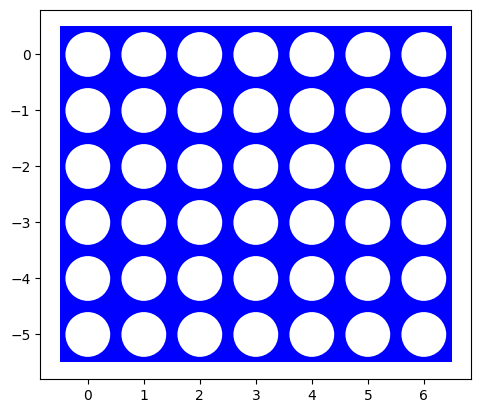

0


In [9]:
# Visualization code by Randolph Rankin

import matplotlib.pyplot as plt

def visualize(board):
    plt.axes()
    rectangle=plt.Rectangle((-0.5,len(board)*-1+0.5),len(board[0]),len(board),fc='blue')
    circles=[]
    for i,row in enumerate(board):
        for j,val in enumerate(row):
            color='white' if val==0 else 'red' if val==1 else 'yellow'
            circles.append(plt.Circle((j,i*-1),0.4,fc=color))

    plt.gca().add_patch(rectangle)
    for circle in circles:
        plt.gca().add_patch(circle)

    plt.axis('scaled')
    plt.show()
    
board = [[0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0]]
visualize(board)
print(board[0][2])

Implement helper functions for:

* A check for available actions in each state `actions(s)`.
* The transition model `result(s, a)`.
* Check for terminal states `terminal(s)`.
* The utility function `utility(s)`.

Make sure that all these functions work with boards of different sizes (number of columns and rows).

In [10]:
# Your code/ answer goes here.

import numpy as np
import random

class ConnectFo:

    def __init__(self, mark, rows=6, columns=7, board=None):
        self.rows = rows
        self.columns = columns
        if board is None:
            self.board = np.zeros((rows, columns), dtype=int)
        else:
            self.board = board
        self.current_player = mark

    def create_random_board(self, rows=None, columns=None):
        # Create an empty board
        if rows == None: rows = self.rows
        if columns == None: columns = self.columns
        board = np.zeros((rows, columns), dtype=int)
        player = 1

        for col in range(columns):
            # Determine a random number of pieces in this column
            pieces_in_col = random.randint(0, rows)

            for row in range(pieces_in_col):
                # Add a piece to the board, ensuring it's either a 1 or -1
                board[row, col] = player
                player *= -1

        # The board has been built bottom-up, but traditionally, we visualize Connect 4 boards top-down,
        # so we need to flip it vertically.
        self.board = np.flip(board, 0)

    # will return a +1 if player 1 has played and player 2 has not, otherwise a zero if player 2 has played or no playe has
    # assuming game has started when function is called
    def get_player(self):
        num_plays = np.count_nonzero(self.board)

        # If the number of plays is even, it's player 1's turn (return 1). Otherwise, it's player 2's turn (return -1).
        return 1 if num_plays % 2 == 0 else -1


    # returns an array with every column with available moves
    def actions(self):
        return [col for col in range(len(self.board[0])) if 0 in self.board[:,col]]

    # update the state with the action
    def result (self, action):
        state = self.board.copy()
        col_seg = state[:, action]
        spot = np.where(col_seg == 0)[0]

        # if there is spaces in the column
        if spot.size > 0:
            row = spot[-1]
            state[row,action]  = self.current_player
            return state

        return None

    def check_board(self):
        # Define the winning sequence for players
        player_markers = [1, -1]

        # Define directions to check: vertical, horizontal, diagonal down-right, diagonal up-right
        directions = [(0, 1), (1, 0), (1, 1), (-1, 1)]

        for player in player_markers:
            for row in range(self.rows):
                for col in range(self.columns):
                    # Check all four directions from the current cell
                    for dr, dc in directions:
                        if self.check_direction(row, col, dr, dc, player):
                            return player  # Current player wins

        # Check for a full board without a winner (draw)
        if np.all(self.board != 0):
            return 0  # Draw

        return 2  # No winner yet
    
    def check_direction(self, start_row, start_col, dr, dc, player):
        # Check if a line of four of the player's pieces exists starting from (start_row, start_col) in direction (dr, dc)
        for i in range(4):
            row = start_row + i * dr
            col = start_col + i * dc
            if not (0 <= row < self.rows and 0 <= col < self.columns):  # Check bounds
                return False
            if self.board[row, col] != player:
                return False
        return True

    def terminal(self):
        # The game is over if someone has won or the board is full (a draw).
        result = self.check_board()
        if result != 2:  # 2 indicates the game is still going on
            return True
        return False


    def utility(self):
        result = self.check_board()
        if result == 1:  # Player 1 wins
            return 1
        elif result == -1:  # Player 2 wins
            return -1
        elif result == 0:  # Draw
            return 0  # Draw is typically considered a neutral outcome
        # If the game is still ongoing, utility should not be called, but you can handle this case if needed
        else:
            raise ValueError("Utility called on non-terminal state")



Implement an agent that plays randomly. Make sure the agent function receives as the percept the board and returns a valid action. Use an agent function definition with the following signature (arguments):

`def random_player(board, player = 1): ...`

The argument `player` is used for agents that do not store what color they are playing. The value passed on by the environment should be 1 ot -1 for player red and yellow, respectively.  See [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) for an example.

In [11]:
# Your code/ answer goes here.
def random_player(board, player = None):
    return np.random.choice(actions(board))


Let two random agents play against each other 1000 times. Look at the [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) to see how the environment uses the agent functions to play against each other.

How often does each player win? Is the result expected?

In [12]:
import numpy as np

def switch_player(player):
    """Switch the active player."""
    return 1 if player == -1 else -1  # switches between player 1 and -1

def play(agent1, agent2, N=1, show_final_board=False):
    """Let two agents play each other N times in a game of Connect 4."""
    results = {'1': 0, '-1': 0, 'd': 0}  # '1' and '-1' correspond to the two players
    
    for i in range(N):
        board = create_board()  # initialize the game board
        player = 1  # player '1' starts
        
        while True:
            # Choose the appropriate agent for the current player
            action = agent1(board) if player == 1 else agent2(board)
            
            # Update the board state based on the action
            new_state = result(board, action)
            if new_state is None:
                continue  # if the move was invalid, retry without switching player
            board = new_state

            # Check if the game has concluded
            if terminal(board):  # check for terminal state
                winner = check_board(board)  # check for winner
                if winner is not None:
                    results[str(winner)] += 1  # update win count
                else:  # draw
                    results['d'] += 1
                
                if show_final_board:
                    print(f'Game {i+1} finished. Winner: {winner}\nFinal board state:')
                    print(board)
                break  # break out of the while loop, ending the current game
            
            # Switch players for the next turn
            player = switch_player(player)
    
    return results

# Function definitions (create_board, result, check_board, terminal, etc.) are assumed to be already defined above.

# Now, you need to define the 'random_player' function that will serve as 'agent1' and 'agent2'
def random_player(board):
    """Randomly choose a valid move."""
    possible_actions = actions(board)
    return np.random.choice(possible_actions)

def create_board(rows=6, columns=7):
    """Create a new Connect Four board."""
    return np.zeros((rows, columns), dtype=int)

# Create a new board and start a series of games
board = create_board()  # create a new board

# Simulate games between two agents
results = play(random_player, random_player, N=100, show_final_board=False)  # both agents are random players
print("Results after 100 games:", results)



TypeError: 'set' object is not callable

## Task 3: Minimax Search with Alpha-Beta Pruning

### Implement the Search [20 points] 

Implement minimax search starting from a given board for specifying the player.
You can use code from the [tic-tac-toe example](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_alpha_beta_tree_search.ipynb).

__Important Notes:__ 
* Make sure that all your agent functions have a signature consistent with the random agent above and that it [uses a class to store state information.](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb)
This is essential to be able play against agents from other students later.
* The search space for a $6 \times 7$ board is large. You can experiment with smaller boards (the smallest is $4 \times 4$) and/or changing the winning rule to connect 3 instead of 4.

In [ ]:
# Your code/ answer goes here.

import numpy as np
import random

# not minimax
# not ab prunin

class ConnectPo:

    def __init__(self, mark, rows=6, columns=7, board=None):
        self.rows = rows
        self.columns = columns
        if board is None:
            self.board = np.zeros((rows, columns), dtype=int)
        else:
            self.board = board
        self.current_player = mark
        self.last_move = []

    def save_board(self, board):
        self.board = board

    def create_random_board(self, rows=None, columns=None):
        # Create an empty board
        if rows == None: rows = self.rows
        if columns == None: columns = self.columns
        board = np.zeros((rows, columns), dtype=int)
        player = self.get_player()

        for col in range(columns):
            # Determine a random number of pieces in this column
            pieces_in_col = random.randint(0, rows)

            for row in range(pieces_in_col):
                # Add a piece to the board, ensuring it's either a 1 or -1
                board[row, col] = player
                player = -player

        # The board has been built bottom-up, but traditionally, we visualize Connect 4 boards top-down,
        # so we need to flip it vertically.
        self.board = np.flip(board, 0)

    # will return a +1 if player 1 has played and player 2 has not, otherwise a zero if player 2 has played or no playe has
    # assuming game has started when function is called
    def get_player(self):
        num_plays = np.count_nonzero(self.board)

        # If the number of plays is even, it's player 1's turn (return 1). Otherwise, it's player 2's turn (return -1).
        return 1 if num_plays % 2 == 0 else -1


    # returns an array with every column with available moves
    def actions(self):
        return [col for col in range(len(self.board[0])) if 0 in self.board[:,col]]

    # update the state with the action
    def result (self, action):
        state = self.board.copy()
        col_seg = state[:, action]
        spot = np.where(col_seg == 0)[0]

        # if there is spaces in the column
        if spot.size > 0:
            row = spot[-1]
            state[row,action]  = self.current_player
            self.last_move.append(action)
            return state

        return None
    
    def undo(self):
        if self.last_move:
            # Retrieve the last move
            last_col = self.last_move.pop()
            # Find the last non-zero entry in this column
            row = next((r for r, val in enumerate(self.board[:, last_col]) if val != 0), None)
            if row is not None:
                self.board[row, last_col] = 0

            # Change the current player back
            self.current_player *= -1
    
    # checks if the move leads to a win
    def check_move(self, move):
        player = self.get_player()

        x,y = move
        x2,y2 = move

        row_seg = self.board[x, max(0, y-3):min(len(self.board), y+4)]
        col_seg = self.board[max(0, x-3):min(len(self.board[0]), x+4), y]
        diag_down_seg = [self.board[x][y]]
        diag_up_seg = [self.board[x][y]]

        while x < len(self.board) and x2 >= 0 and y < len(self.board[0] and y2 >= 0):
            # increment / decrement indexes
            x += 1
            y += 1
            x2 -= 1
            y2 -= 1

            # getting upper left
            # -x-y
            if x2 >= 0 and y2 >=0:
                diag_down_seg.insert(0, self.board[x][y])
            
            # getting lower right
            # +x+y
            if x < len(self.board) and y < len(self.board[0]):
                diag_down_seg.append(self.board[x][y])

            # getting lower left
            # -x+y
            if x2 >= 0 and y < len(self.board[0]):
                diag_up_seg.insert(0, self.board[x][y])
            
            # getting upper right
            # +x-y
            if x < len(self.board) and y >= 0:
                diag_up_seg.append(self.board[x][y])

        winning_sequence = [player] * 4
        # check row
        if np.any(np.convolve((row_seg == player).astype(int), winning_sequence, mode='valid') == 4):
            return player
        # check col
        elif np.any(np.convolve((col_seg == player).astype(int), winning_sequence, mode='valid') == 4):
            return player
        # check diagonal down
        elif np.any(np.convolve((diag_down_seg == player).astype(int), winning_sequence, mode='valid') == 4):
            return player0
        # check diagonal down
        elif np.any(np.convolve((diag_up_seg == player).astype(int), winning_sequence, mode='valid') == 4):
            return player

        return None

    def check_board(self):
        # Define the winning sequence for players
        player_markers = [1, -1]

        # Define directions to check: vertical, horizontal, diagonal down-right, diagonal up-right
        directions = [(0, 1), (1, 0), (1, 1), (-1, 1)]

        for player in player_markers:
            for row in range(self.rows):
                for col in range(self.columns):
                    # Check all four directions from the current cell
                    for dr, dc in directions:
                        if self.check_direction(row, col, dr, dc, player):
                            return player  # Current player wins

        # Check for a full board without a winner (draw)
        if np.all(self.board != 0):
            return 0  # Draw

        return 2  # No winner yet
    
    # add values to moves
    def  best_move(self, move):
        score = 0
        player = self.get_player()

        x,y = move
        x2,y2 = move

        row_seg = self.board[x, max(0, y-3):min(len(self.board), y+4)]
        col_seg = self.board[max(0, x-3):min(len(self.board[0]), x+4), y]
        diag_down_seg = [self.board[x][y]]
        diag_up_seg = [self.board[x][y]]

        # Upper left and lower right
        for i in range(1, 4):
            if x-i >= 0 and y-i >= 0:
                diag_down_seg.insert(0, self.board[x-i][y-i])
            if x+i < len(self.board) and y+i < len(self.board[0]):
                diag_down_seg.append(self.board[x+i][y+i])

        # Lower left and upper right
        for i in range(1, 4):
            if x+i < len(self.board) and y-i >= 0:
                diag_up_seg.append(self.board[x+i][y-i])
            if x-i >= 0 and y+i < len(self.board[0]):
                diag_up_seg.insert(0, self.board[x-i][y+i])
        
        # Score will be based off powers of 2 for consistency of scaling
        # 2 4 8 16 32 64 128 256 512 1024 2086 4172
        
        # Current User Scoring
        #row for user
        if np.any(np.convolve((row_seg == player).astype(int), [player]*4, mode='valid') == 4):
            score += 10000
        elif np.any(np.convolve((row_seg == player).astype(int), [player]*3, mode='valid') == 3):
            score += 100 
        elif np.any(np.convolve((row_seg == player).astype(int), [player]*2, mode='valid') == 2):
            score += 10 
        # col for user
        if np.any(np.convolve((col_seg == player).astype(int), [player]*4, mode='valid') == 4):
            score += 10000
        elif np.any(np.convolve((col_seg == player).astype(int), [player]*3, mode='valid') == 3):
            score += 100 
        elif np.any(np.convolve((col_seg == player).astype(int), [player]*2, mode='valid') == 2):
            score += 10 
        #diag down for user
        if np.any(np.convolve((diag_down_seg == player).astype(int), [player]*4, mode='valid') == 4):
            score += 10000
        elif np.any(np.convolve((diag_down_seg == player).astype(int), [player]*3, mode='valid') == 3):
            score += 100 
        elif np.any(np.convolve((diag_down_seg == player).astype(int), [player]*2, mode='valid') == 2):
            score += 10 
        #diag up for user
        if np.any(np.convolve((diag_up_seg == player).astype(int), [player]*4, mode='valid') == 4):
            score += 10000
        elif np.any(np.convolve((diag_up_seg == player).astype(int), [player]*3, mode='valid') == 3):
            score += 100 
        elif np.any(np.convolve((diag_up_seg == player).astype(int), [player]*2, mode='valid') == 2):
            score += 10 
        
        # Other User Scoring
        player = -player
        #row for user
        if np.any(np.convolve((row_seg == player).astype(int), [player]*4, mode='valid') == 4):
            score -= 5000
        elif np.any(np.convolve((row_seg == player).astype(int), [player]*3, mode='valid') == 3):
            score -= 50 
        elif np.any(np.convolve((row_seg == player).astype(int), [player]*2, mode='valid') == 2):
            score -= 5
        # col for user
        if np.any(np.convolve((col_seg == player).astype(int), [player]*4, mode='valid') == 4):
            score -= 5000
        elif np.any(np.convolve((col_seg == player).astype(int), [player]*3, mode='valid') == 3):
            score -= 50 
        elif np.any(np.convolve((col_seg == player).astype(int), [player]*2, mode='valid') == 2):
            score -= 5
        #diag down for user
        if np.any(np.convolve((diag_down_seg == player).astype(int), [player]*4, mode='valid') == 4):
            score -= 5000
        elif np.any(np.convolve((diag_down_seg == player).astype(int), [player]*3, mode='valid') == 3):
            score -= 50 
        elif np.any(np.convolve((diag_down_seg == player).astype(int), [player]*2, mode='valid') == 2):
            score -= 5
        #diag up for user
        if np.any(np.convolve((diag_up_seg == player).astype(int), [player]*4, mode='valid') == 4):
            score -= 5000
        elif np.any(np.convolve((diag_up_seg == player).astype(int), [player]*3, mode='valid') == 3):
            score -= 50 
        elif np.any(np.convolve((diag_up_seg == player).astype(int), [player]*2, mode='valid') == 2):
            score -= 5

        return score
    
    def heuristic(self):
        score = 0
        player = self.get_player()

        # Score will be based off powers of 2 for consistency of scaling
        # 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2086, 4172

        winning_sequence = [player, player, player, player]
        opponent_sequence = [-player, -player, -player, -player]

        # Check all rows, columns, and diagonals for potential wins or blocks
        for row in range(self.rows):
            for col in range(self.columns):
                # Horizontal segment
                if col + 3 < self.columns:
                    check_seg = self.board[row, col:col+4]
                    score += self.evaluate_segment(check_seg, winning_sequence, opponent_sequence)
                # Vertical segment
                if row + 3 < self.rows:
                    check_seg = self.board[row:row+4, col]
                    score += self.evaluate_segment(check_seg, winning_sequence, opponent_sequence)
                # Diagonal down-right segment
                if row + 3 < self.rows and col + 3 < self.columns:
                    check_seg = [self.board[row+i][col+i] for i in range(4)]
                    score += self.evaluate_segment(check_seg, winning_sequence, opponent_sequence)
                # Diagonal up-right segment
                if row - 3 >= 0 and col + 3 < self.columns:
                    check_seg = [self.board[row-i][col+i] for i in range(4)]
                    score += self.evaluate_segment(check_seg, winning_sequence, opponent_sequence)

        return score

    def evaluate_segment(self, segment, winning_sequence, opponent_sequence):
        # This function evaluates a segment of four slots in the board.
        score = 0
        if np.array_equal(segment, winning_sequence):
            score += 10000
        elif np.array_equal(segment, opponent_sequence):
            score -= 5000
        else:
            player_count = np.count_nonzero(segment == winning_sequence[0])
            opponent_count = np.count_nonzero(segment == opponent_sequence[0])

            if player_count == 3 and opponent_count == 0:
                score += 100
            elif player_count == 2 and opponent_count == 0:
                score += 10

            if opponent_count == 3 and player_count == 0:
                score -= 50
            elif opponent_count == 2 and player_count == 0:
                score -= 5

        return score

    
    def check_direction(self, start_row, start_col, dr, dc, player):
        # Check if a line of four of the player's pieces exists starting from (start_row, start_col) in direction (dr, dc)
        for i in range(4):
            row = start_row + i * dr
            col = start_col + i * dc
            if not (0 <= row < self.rows and 0 <= col < self.columns):  # Check bounds
                return False
            if self.board[row, col] != player:
                return False
        return True

    def terminal(self):
        # The game is over if someone has won or the board is full (a draw).
        result = self.check_board()
        if result != 2:  # 2 indicates the game is still going on
            return True
        return False


    def utility(self):
        result = self.check_board()
        if result == 1:  # Player 1 wins
            return 1
        elif result == -1:  # Player 2 wins
            return -1
        elif result == 0:  # Draw
            return 0  # Draw is typically considered a neutral outcome
        # If the game is still ongoing, utility should not be called, but you can handle this case if needed
        else:
            raise ValueError("Utility called on non-terminal state")



In [2]:
# Your code/ answer goes here.

import numpy as np
import random

class ConnectHo:

    def __init__(self, mark, rows=6, columns=7, board=None):
        self.rows = rows
        self.columns = columns
        if board is None:
            self.board = np.zeros((rows, columns), dtype=int)
        else:
            self.board = board
        self.current_player = mark
        self.last_move = []

    def save_board(self, board):
        self.board = board

    def create_random_board(self, rows=None, columns=None):
        # Create an empty board
        if rows == None: rows = self.rows
        if columns == None: columns = self.columns
        board = np.zeros((rows, columns), dtype=int)
        player = self.get_player()

        for col in range(columns):
            # Determine a random number of pieces in this column
            pieces_in_col = random.randint(0, rows)

            for row in range(pieces_in_col):
                # Add a piece to the board, ensuring it's either a 1 or -1
                board[row, col] = player
                player = -player

        # The board has been built bottom-up, but traditionally, we visualize Connect 4 boards top-down,
        # so we need to flip it vertically.
        self.board = np.flip(board, 0)

    # will return a +1 if player 1 has played and player 2 has not, otherwise a zero if player 2 has played or no playe has
    # assuming game has started when function is called
    def get_player(self):
        num_plays = np.count_nonzero(self.board)

        # If the number of plays is even, it's player 1's turn (return 1). Otherwise, it's player 2's turn (return -1).
        return 1 if num_plays % 2 == 0 else -1


    # returns an array with every column with available moves
    def actions(self):
        return [col for col in range(len(self.board[0])) if 0 in self.board[:,col]]

    # update the state with the action
    def result (self, action):
        state = self.board.copy()
        col_seg = state[:, action]
        spot = np.where(col_seg == 0)[0]

        # if there is spaces in the column
        if spot.size > 0:
            row = spot[-1]
            state[row,action]  = self.current_player
            self.last_move.append(action)
            return state

        return None
    
    def undo(self):
        if self.last_move:
            # Retrieve the last move
            last_col = self.last_move.pop()
            # Find the last non-zero entry in this column
            row = next((r for r, val in enumerate(self.board[:, last_col]) if val != 0), None)
            if row is not None:
                self.board[row, last_col] = 0

            # Change the current player back
            self.current_player *= -1

    def check_board(self):
        # Define the winning sequence for players
        player_markers = [1, -1]

        # Define directions to check: vertical, horizontal, diagonal down-right, diagonal up-right
        directions = [(0, 1), (1, 0), (1, 1), (-1, 1)]

        for player in player_markers:
            for row in range(self.rows):
                for col in range(self.columns):
                    # Check all four directions from the current cell
                    for dr, dc in directions:
                        if self.check_direction(row, col, dr, dc, player):
                            return player  # Current player wins

        # Check for a full board without a winner (draw)
        if np.all(self.board != 0):
            return 0  # Draw

        return 2  # No winner yet
    
    def check_direction(self, start_row, start_col, dr, dc, player):
        # Check if a line of four of the player's pieces exists starting from (start_row, start_col) in direction (dr, dc)
        for i in range(4):
            row = start_row + i * dr
            col = start_col + i * dc
            if not (0 <= row < self.rows and 0 <= col < self.columns):  # Check bounds
                return False
            if self.board[row, col] != player:
                return False
        return True
    
    # add values to moves
    def  check_move(self, move):
        score = 0
        player = self.get_player()

        x,y = move
        x2,y2 = move

        row_seg = self.board[x, max(0, y-3):min(len(self.board), y+4)]
        col_seg = self.board[max(0, x-3):min(len(self.board[0]), x+4), y]
        diag_down_seg = [self.board[x][y]]
        diag_up_seg = [self.board[x][y]]

        # Upper left and lower right
        for i in range(1, 4):
            if x-i >= 0 and y-i >= 0:
                diag_down_seg.insert(0, self.board[x-i][y-i])
            if x+i < len(self.board) and y+i < len(self.board[0]):
                diag_down_seg.append(self.board[x+i][y+i])

        # Lower left and upper right
        for i in range(1, 4):
            if x+i < len(self.board) and y-i >= 0:
                diag_up_seg.append(self.board[x+i][y-i])
            if x-i >= 0 and y+i < len(self.board[0]):
                diag_up_seg.insert(0, self.board[x-i][y+i])
        
        # Score will be based off powers of 2 for consistency of scaling
        # 2 4 8 16 32 64 128 256 512 1024 2086 4172
        
        # Current User Scoring
        #row for user
        if np.any(np.convolve((row_seg == player).astype(int), [player]*4, mode='valid') == 4):
            score += 10000
        elif np.any(np.convolve((row_seg == player).astype(int), [player]*3, mode='valid') == 3):
            score += 100 
        elif np.any(np.convolve((row_seg == player).astype(int), [player]*2, mode='valid') == 2):
            score += 10 
        # col for user
        if np.any(np.convolve((col_seg == player).astype(int), [player]*4, mode='valid') == 4):
            score += 10000
        elif np.any(np.convolve((col_seg == player).astype(int), [player]*3, mode='valid') == 3):
            score += 100 
        elif np.any(np.convolve((col_seg == player).astype(int), [player]*2, mode='valid') == 2):
            score += 10 
        #diag down for user
        if np.any(np.convolve((diag_down_seg == player).astype(int), [player]*4, mode='valid') == 4):
            score += 10000
        elif np.any(np.convolve((diag_down_seg == player).astype(int), [player]*3, mode='valid') == 3):
            score += 100 
        elif np.any(np.convolve((diag_down_seg == player).astype(int), [player]*2, mode='valid') == 2):
            score += 10 
        #diag up for user
        if np.any(np.convolve((diag_up_seg == player).astype(int), [player]*4, mode='valid') == 4):
            score += 10000
        elif np.any(np.convolve((diag_up_seg == player).astype(int), [player]*3, mode='valid') == 3):
            score += 100 
        elif np.any(np.convolve((diag_up_seg == player).astype(int), [player]*2, mode='valid') == 2):
            score += 10 
        
        # Other User Scoring
        player = -player
        #row for user
        if np.any(np.convolve((row_seg == player).astype(int), [player]*4, mode='valid') == 4):
            score -= 5000
        elif np.any(np.convolve((row_seg == player).astype(int), [player]*3, mode='valid') == 3):
            score -= 50 
        elif np.any(np.convolve((row_seg == player).astype(int), [player]*2, mode='valid') == 2):
            score -= 5
        # col for user
        if np.any(np.convolve((col_seg == player).astype(int), [player]*4, mode='valid') == 4):
            score -= 5000
        elif np.any(np.convolve((col_seg == player).astype(int), [player]*3, mode='valid') == 3):
            score -= 50 
        elif np.any(np.convolve((col_seg == player).astype(int), [player]*2, mode='valid') == 2):
            score -= 5
        #diag down for user
        if np.any(np.convolve((diag_down_seg == player).astype(int), [player]*4, mode='valid') == 4):
            score -= 5000
        elif np.any(np.convolve((diag_down_seg == player).astype(int), [player]*3, mode='valid') == 3):
            score -= 50 
        elif np.any(np.convolve((diag_down_seg == player).astype(int), [player]*2, mode='valid') == 2):
            score -= 5
        #diag up for user
        if np.any(np.convolve((diag_up_seg == player).astype(int), [player]*4, mode='valid') == 4):
            score -= 5000
        elif np.any(np.convolve((diag_up_seg == player).astype(int), [player]*3, mode='valid') == 3):
            score -= 50 
        elif np.any(np.convolve((diag_up_seg == player).astype(int), [player]*2, mode='valid') == 2):
            score -= 5

        return score
    
    def heuristic(self):
        score = 0
        player = self.get_player()

        # Score will be based off powers of 2 for consistency of scaling
        # 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2086, 4172

        winning_sequence = [player, player, player, player]
        opponent_sequence = [-player, -player, -player, -player]

        # Check all rows, columns, and diagonals for potential wins or blocks
        for row in range(self.rows):
            for col in range(self.columns):
                # Horizontal segment
                if col + 3 < self.columns:
                    check_seg = self.board[row, col:col+4]
                    score += self.evaluate_segment(check_seg, winning_sequence, opponent_sequence)
                # Vertical segment
                if row + 3 < self.rows:
                    check_seg = self.board[row:row+4, col]
                    score += self.evaluate_segment(check_seg, winning_sequence, opponent_sequence)
                # Diagonal down-right segment
                if row + 3 < self.rows and col + 3 < self.columns:
                    check_seg = [self.board[row+i][col+i] for i in range(4)]
                    score += self.evaluate_segment(check_seg, winning_sequence, opponent_sequence)
                # Diagonal up-right segment
                if row - 3 >= 0 and col + 3 < self.columns:
                    check_seg = [self.board[row-i][col+i] for i in range(4)]
                    score += self.evaluate_segment(check_seg, winning_sequence, opponent_sequence)

        return score

    def evaluate_segment(self, segment, winning_sequence, opponent_sequence):
        # This function evaluates a segment of four slots in the board.
        score = 0
        if np.array_equal(segment, winning_sequence):
            score += 10000
        elif np.array_equal(segment, opponent_sequence):
            score -= 5000
        else:
            player_count = np.count_nonzero(segment == winning_sequence[0])
            opponent_count = np.count_nonzero(segment == opponent_sequence[0])

            if player_count == 3 and opponent_count == 0:
                score += 100
            elif player_count == 2 and opponent_count == 0:
                score += 10

            if opponent_count == 3 and player_count == 0:
                score -= 50
            elif opponent_count == 2 and player_count == 0:
                score -= 5

        return score

    def terminal(self):
        # The game is over if someone has won or the board is full (a draw).
        result = self.check_board()
        if result != 2:  # 2 indicates the game is still going on
            return True
        return False


    def utility(self):
        result = self.check_board()
        if result == 1:  # Player 1 wins
            return 1
        elif result == -1:  # Player 2 wins
            return -1
        elif result == 0:  # Draw
            return 0  # Draw is typically considered a neutral outcome
        # If the game is still ongoing, utility should not be called, but you can handle this case if needed
        else:
            raise ValueError("Utility called on non-terminal state")



In [5]:
import numpy as np
import math

DEBUG = 2
COUNT = 0

def minimax_search(game):
    global DEBUG, COUNT
    COUNT = 0
    depth = 7

    value, move = max_value(game, depth, -math.inf, +math.inf)

    if DEBUG >= 1: print(f"Number of nodes searched: {COUNT}") 

    return { "move": move, "value": value }

def max_value(game, depth, alpha, beta):
    global DEBUG, COUNT
    COUNT += 1

    if depth == 0 or game.terminal():
        return game.heuristic(), None

    v, move = -math.inf, None
    for a in game.actions():
        new_state = game.result(a)
        if new_state is not None:
            new_game = ConnectHo(mark=-game.current_player, board=new_state)
            v2, a2 = min_value(new_game, depth-1, alpha, beta)
            if v2 > v:
                v, move = v2, a
                alpha = max(alpha, v)
            if v >= beta:
                return v, move

    return v, move

def min_value(game, depth, alpha, beta):
    global DEBUG, COUNT
    COUNT += 1

    if depth == 0 or game.terminal():
        return game.heuristic(), None

    v, move = math.inf, None

    for a in game.actions():
        new_state = game.result(a)
        if new_state is not None:
            new_game = ConnectHo(mark=-game.current_player, board=new_state)
            v2, a2 = max_value(new_game, depth-1, alpha, beta)
            if v2 < v:
                v, move = v2, a
                beta = min(beta, v)
            if v <= alpha:
                return v, move

    return v, move



Experiment with some manually created boards (at least 5) to check if the agent spots winning opportunities.

In [6]:
# Your code/ answer goes here.
game = ConnectHo(1)

for i in range(5):
    game.create_random_board()
    print(game.board)
    print(minimax_search(game))

[[ 0  0  0  0  0  0  0]
 [ 0  0 -1  0  0  0  0]
 [-1  0  1  0  0  1  0]
 [ 1  0 -1  0  0 -1 -1]
 [-1  0  1 -1  0  1  1]
 [ 1  1 -1  1  1 -1 -1]]
Number of nodes searched: 10868
{'move': 0, 'value': 5}
[[ 0 -1  0  0  0  0  0]
 [ 0  1  1  0 -1  0  1]
 [-1 -1 -1  0  1  0 -1]
 [ 1  1  1  0 -1  0  1]
 [-1 -1 -1  0  1 -1 -1]
 [ 1  1  1  0 -1  1  1]]
Number of nodes searched: 1236
{'move': 3, 'value': 10010}
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0 -1  0  0]
 [ 0  0  0  0  1  0  1]
 [ 0  0  0  0 -1  0 -1]
 [ 0  0 -1  0  1  0  1]
 [-1  0  1  1 -1  1 -1]]
Number of nodes searched: 8387
{'move': 4, 'value': 10}
[[ 0  0  0  0  0  0  0]
 [ 1 -1  0  0  0  0  0]
 [-1  1  0  0  0  0  0]
 [ 1 -1  0  0  0  0 -1]
 [-1  1  0  0  0  1  1]
 [ 1 -1  0  0  1 -1 -1]]
Number of nodes searched: 7295
{'move': 3, 'value': -5}
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 1  0  1  0  0  0  0]
 [-1  0 -1  0  0  0 -1]
 [ 1 -1  1 -1  1 -1  1]]
Number of nodes searched: 12377
{'move': 3, 'val

How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

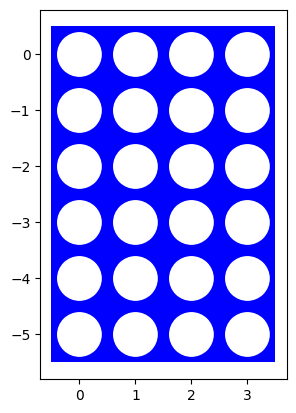

IndexError: index 4 is out of bounds for axis 1 with size 4

In [ ]:
# Your code/ answer goes here.
import time

# ... [Your existing ConnectFo and minimax code] ...

def timed_minimax_search(game):
    start_time = time.time()
    result = minimax_search(game)
    end_time = time.time()
    elapsed_time = end_time - start_time
    return result, elapsed_time

# ... [Rest of your code] ...

# When you want to measure the time taken for a move, you can do:
game = ConnectFo(mark=1, rows=6, columns=4)  # Start with a smaller board
game.create_random_board(rows=game.rows, columns=game.columns)
visualize(game.board)
# You can create a random board or set it up as you like here
# game.create_random_board() or set up a custom board state

result, time_taken = timed_minimax_search(game)
print(f"Move: {result['move']}, Value: {result['value']}, Time taken: {time_taken} seconds")

# Then you can repeat the process for larger boards
for columns in range(4, 8):  # Example: Increasing columns from 4 to 7
    game = ConnectFo(mark=1, rows=6, columns=columns)
    game.create_random_board()
    visualize(game.board)
    # Set up the board as required
    result, time_taken = timed_minimax_search(game)
    print(f"Columns: {columns}, Move: {result['move']}, Value: {result['value']}, Time taken: {time_taken} seconds")


### Move ordering [5 points]

Starting the search with better moves will increase the efficiency of alpha-beta pruning. Describe and implement a simple move ordering strategy. Make a table that shows how the ordering strategies influence the time it takes to make a move?

In [ ]:
# Your code/ answer goes here.

### The first few moves [5 points]

Start with an empty board. This is the worst case scenario for minimax search since it needs solve all possible games that can be played (minus some pruning) before making the decision. What can you do? 

In [ ]:
# Your code/ answer goes here.

### Playtime [5 points]

Let the Minimax Search agent play a random agent on a small board. Analyze wins, losses and draws.

In [ ]:
# Your code/ answer goes here.

## Task 4: Heuristic Alpha-Beta Tree Search

### Heuristic evaluation function [15 points]

Define and implement a heuristic evaluation function.

In [ ]:
def minimax(self, depth, alpha, beta, maximizingPlayer):
    valid_locations = self.actions()
    is_terminal = self.check_board()
    if depth == 0 or is_terminal != 2:
        if is_terminal != 2:
            if is_terminal == self.current_player:
                return (None, 100000000000000)
            elif is_terminal == -self.current_player:
                return (None, -100000000000000)
            else:  # Game is over, no more valid moves
                return (None, 0)
        else:  # Depth is zero
            return (None, self.heuristic())
    if maximizingPlayer:
        value = -np.inf
        column = random.choice(valid_locations)
        for col in valid_locations:
            # Make the move
            row = self.result(col)
            self.current_player *= -1  # Switch to the other player
            new_score = minimax(self, depth-1, alpha, beta, False)[1]
            self.undo()  # Undo the move
            self.current_player *= -1  # Switch back to the maximizing player
            if new_score > value:
                value = new_score
                column = col
            alpha = max(alpha, value)
            if alpha >= beta:
                break
        return column, value

    else:  # Minimizing player
        value = np.inf
        column = random.choice(valid_locations)
        for col in valid_locations:
            # Make the move
            row = self.result(col)
            self.current_player *= -1  # Switch to the other player
            new_score = minimax(self, depth-1, alpha, beta, True)[1]
            self.undo()  # Undo the move
            self.current_player *= -1  # Switch back to the minimizing player
            if new_score < value:
                value = new_score
                column = col
            beta = min(beta, value)
            if alpha >= beta:
                break
        return column, value

def undo(self):
    if self.last_move:
        last_col = self.last_move.pop()
        for row in range(self.rows-1, -1, -1):  # Start checking from the bottom of the column
            if self.board[row][last_col] != 0:
                self.board[row][last_col] = 0
                break


In [ ]:
game = ConnectHo(1)

for i in range(5):
    game.create_random_board()
    visualize(game.board)
    best_move, score = minimax(game, 7,  -math.inf, +math.inf, True)
    print(f"Best Move: {best_move}, Score: {score}")
    visualize(game.board)

NameError: name 'ConnectHo' is not defined

### Cutting off search [10 points]

Modify your Minimax Search with Alpha-Beta Pruning to cut off search at a specified depth and use the heuristic evaluation function. Experiment with different cutoff values.

In [ ]:
# Your code/ answer goes here.

Experiment with the same manually created boards as above to check if the agent spots wining opportunities.

In [ ]:
# Your code/ answer goes here.

How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

In [ ]:
# Your code/ answer goes here.

### Playtime [5 points]

Let two heuristic search agents (different cutoff depth, different heuristic evaluation function) compete against each other on a reasonably sized board. Since there is no randomness, you only need to let them play once.

In [ ]:
# Your code/ answer goes here.

## Challenge task [+ 10 bonus point will be awarded separately]

Find another student and let your best agent play against the other student's best player. We will set up a class tournament on Canvas. This tournament will continue after the submission deadline.

## Graduate student advanced task: Pure Monte Carlo Search and Best First Move [10 point]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+10 bonus point].

### Pure Monte Carlo Search

Implement Pure Monte Carlo Search and investigate how this search performs on the test boards that you have used above. 

In [ ]:
# Your code/ answer goes here.

### Best First Move

Use Oure Monte Carlo Search to determine what the best first move is? Describe under what assumptions this is the "best" first move.  

In [ ]:
# Your code/ answer goes here.